<center>
<h1>Introducción a RKD</h1>
<font color="#127a69"><b>
Universidad Politécnica de Guanajuato <br>
Departamento de Ingeniería Robótica <br>
Fundamentos de Robótica
</b></font>
</center>

RKD es una librería Python diseñada para el análisis cinemático y dinámico de manipuladores. El módulo a revisar en estas notas está pensado como herramienta didáctica en la enseñanza de la cinemática de manipuladores y está basado en la librería SymPy. La otra sección de la librería está pensada para un uso más general y utiliza NumPy como base. 

El código base y la documentación puede encontrarlas en https://github.com/iro-upgto/rkd.


## Importando la librería

Podemos importar la librería como sigue:

In [7]:
from rkd.didactic import *

Con ello tendremos disponibles muchas variables, funciones y clases disponibles (incluyendo las nativas de SymPy). Por ejemplo:

In [21]:
a1,d1,t1,l1,x0,y0,z0,alpha

## Matrices de rotación

### Matrices de rotación básicas

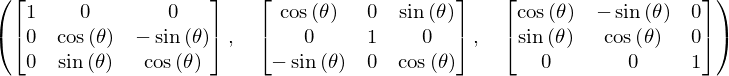

In [25]:
rotx(theta), roty(theta), rotz(theta)

### Composición de matrices

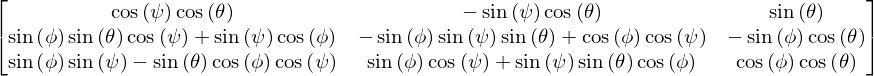

In [26]:
rotx(phi)*roty(theta)*rotz(psi)

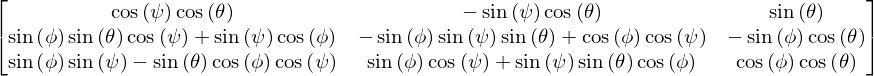

In [31]:
compose_rotations((phi,"x","local"),(theta,"y","local"),(psi,"z","local"))

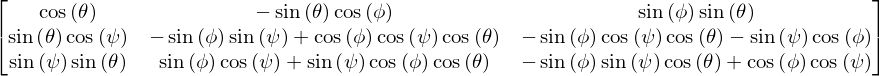

In [33]:
compose_rotations((phi,"x","local"),(theta,"z","fixed"),(psi,"x","fixed"))

¿Sintaxis? Puede solicitar ayuda con la función `help` 

In [34]:
help( compose_rotations )

Help on function compose_rotations in module rkd.didactic.transformations:

compose_rotations(*rotations)
    Composes rotation matrices w.r.t. fixed or movable frames
    
    Parameters
    ----------
    rotations : tuple
        A tuple that contains (angle, axis, frame, deg)
    
    Returns
    -------
    R : :class:`sympy.matrices.dense.MutableDenseMatrix`
        Rotation matrix
    
    Examples
    --------
    >>> compose_rotations((45, "z", "fixed", True), (30, "x", "local", True))
    ⎡0.707106781186548  -0.612372435695794  0.353553390593274 ⎤
    ⎢                                                         ⎥
    ⎢0.707106781186547  0.612372435695795   -0.353553390593274⎥
    ⎢                                                         ⎥
    ⎣        0                 0.5          0.866025403784439 ⎦



## Ángulos de Euler

### Matricez de transformación homogénea dados los ángulos {$\phi$, $\theta$, $\psi$}

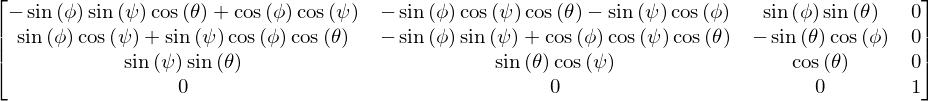

In [38]:
eul2htm(phi,theta,psi) # seq -> zxz

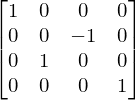

In [39]:
eul2htm(0,pi/2,0)

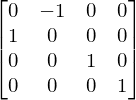

In [40]:
eul2htm(0,0,pi/2)

### Ángulos de Euler equivalentes a una matriz de rotación 

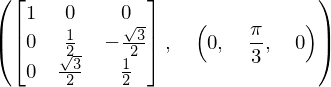

In [43]:
R = rotx(pi/3)
R, htm2eul(R)

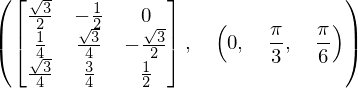

In [44]:
R = rotx(pi/3)*rotz(pi/6)
R, htm2eul(R)

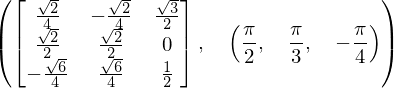

In [45]:
R = roty(pi/3)*rotz(pi/4)
R, htm2eul(R)

## Matrices de transformación homogénea

### Traslación

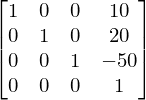

In [49]:
htmtra([10,20,-50])

### Rotación

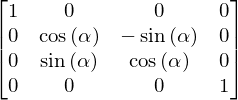

In [50]:
htmrot(alpha, "x")

### Rotación + Traslación

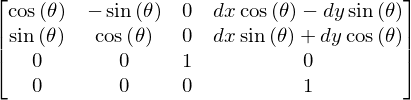

In [55]:
dx,dy = symbols("dx,dy")
htmrot(theta, "z") * htmtra([dx,dy,0])

### Traslación + Rotación

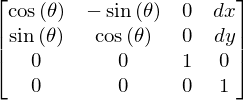

In [56]:
htmtra([dx,dy,0])*htmrot(theta, "z") 

## Matriz DH

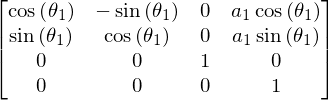

In [60]:
A1 = dh(a1,0,0,t1)
A1

## La clase `Robot`

### Un manipulador planar RR

In [68]:
rr = Robot((l1,0,0,t1,"r"), (l2,0,0,t2,"r"))
rr

**Cinemática directa**

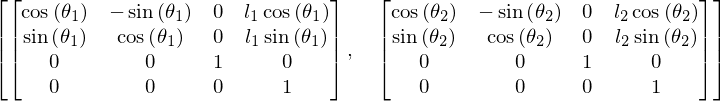

In [69]:
rr.Ts # Matrices A_i

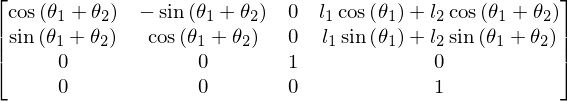

In [70]:
rr.T # Matriz T_2^0

#### Jacobiano

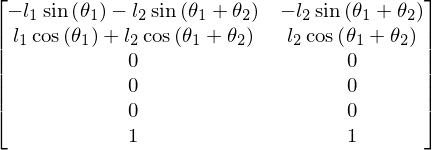

In [71]:
rr.J

#### Representación esquemática

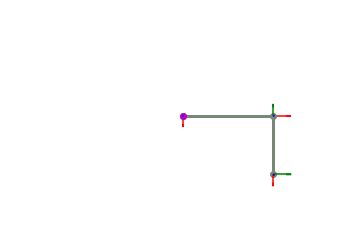

In [77]:
rr.plot_diagram({l1:100, l2:100, t1:pi/2, t2:-pi/2})

## La clase `RigidBody2D`

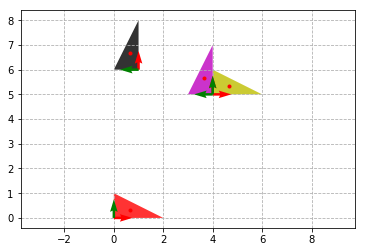

In [98]:
puntos = ((0,0), (2,0), (0,1))
s01 = RigidBody2D(puntos)
s01.draw()
s01.move([4,5,0])
s01.draw("y")
s01.rotate(pi/2)
s01.draw("m")
s01.move([1,3,0])
s01.draw("k")